# 짬뽕
1. 전국 중식당 비율 (중식당이 다른 식당 (한식, 일식, 양식 등등)들에 비해 얼마나 더 있는 알아보기)
    - 현재 영업하고 있는 식당 기준
2. 전국 중식당 언제 많이 생겼는지
    - 언제 중식당이 많이 생겼는지 (폐업 포함) - bar plot, pie plot, 지도 데이터 시각화, SVG 지도시각화
4. 전국 중식당 언제 폐업 많이 했는지
    - 그러나 이들 중 일부분은 이 날에 폐업을 했고 (폐업 날짜)
    - 현존하고 있는 중식당들은 이만큼이다 - 각 지역별 중식당 수, 지도시각화
5. 전국 중식당 분포도 (지도 시각화)
    1) 어느 지역(시, 도)에 얼마나 있는지 - barplot(수 비교), pieplot(비율 비교)
    2) 지도 시각화 - SVG 지도 시각화


## 일반식당 데이터 추출
### 1) 필요한 패키지 참조

In [165]:
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame, concat
import seaborn as sb
import numpy as np

### 2) 필요한 데이터 가져오기
- read_excel()을 통해 데이터 전체 가져오기
    - 총 7개의 sheet가 있어서 모든 sheet안의 데이터 출력을 위해 sheet_name = None 파라미터 적용
- concat()을 통해 sheet 별 데이터프레임 하나로 병합
    - 각 sheet 별 저장된 데이터들을 하나의 데이터프레임으로 병합
- .filter()을 통해 필요한 정보만 추출
- .reset_index().drop('index', axis = 'columns')을 통해 인덱스 재구성

In [13]:
data = read_excel("/Users/dayoonz/Desktop/일반음식점.xlsx", sheet_name = None)
data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


{'일반음식점_1':             번호 개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호  \
 0            1  일반음식점  07_24_04_P   3000000  3000000-101-2018-00409   
 1            2  일반음식점  07_24_04_P   3000000  3000000-101-2018-00390   
 2            3  일반음식점  07_24_04_P   3000000  3000000-101-2019-00005   
 3            4  일반음식점  07_24_04_P   3000000  3000000-101-2018-00396   
 4            5  일반음식점  07_24_04_P   3000000  3000000-101-2018-00434   
 ...        ...    ...         ...       ...                     ...   
 299995  299996  일반음식점  07_24_04_P   3170000  3170000-101-1994-01613   
 299996  299997  일반음식점  07_24_04_P   3170000  3170000-101-1997-04608   
 299997  299998  일반음식점  07_24_04_P   3170000  3170000-101-1994-02494   
 299998  299999  일반음식점  07_24_04_P   3170000  3170000-101-1997-01410   
 299999  300000  일반음식점  07_24_04_P   3170000  3170000-101-1994-02828   
 
              인허가일자  인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장판매직직원수 공장생산직직원수  \
 0       2018-11-27      NaN         3    

In [14]:
일반음식점data = concat([data['일반음식점_1'], data['일반음식점_2'], 
                    data['일반음식점_3'], data['일반음식점_4'], 
                    data['일반음식점_5'], data['일반음식점_6'],
                    data['일반음식점_7']], ignore_index=True)
일반음식점data

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장판매직직원수,공장생산직직원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,1,일반음식점,07_24_04_P,3000000,3000000-101-2018-00409,2018-11-27,NaN,3,폐업,2,...,0.0,0.0,NaN,0.0,0.0,N,386.84,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3000000,3000000-101-2018-00390,2018-11-13,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,50.84,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3000000,3000000-101-2019-00005,2019-01-04,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,7.00,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3000000,3000000-101-2018-00396,2018-11-16,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,Y,115.70,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3000000,3000000-101-2018-00434,2018-12-20,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,17.96,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079992,2079993,일반음식점,07_24_04_P,6520000,6520000-101-2019-00078,2019-02-19,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,45.00,NaN,NaN,NaN
2079993,2079994,일반음식점,07_24_04_P,6520000,6520000-101-2019-00077,2019-02-19,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN
2079994,2079995,일반음식점,07_24_04_P,6520000,6520000-101-2019-00112,2019-03-08,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,46.55,NaN,NaN,NaN
2079995,2079996,일반음식점,07_24_04_P,6520000,6520000-101-2019-00111,2019-03-08,NaN,1,영업/정상,1,...,0.0,0.0,NaN,0.0,0.0,N,200.17,NaN,NaN,NaN


In [15]:
식당data = DataFrame(일반음식점data.filter(['업태구분명', '사업장명', '인허가일자', '영업상태명', '폐업일자','재개업일자','소재지전체주소','좌표정보(X)', '좌표정보(Y)'])).reset_index().drop('index', axis = 'columns')
식당data


,업태구분명,사업장명,인허가일자,영업상태명,폐업일자,재개업일자,소재지전체주소,좌표정보(X),좌표정보(Y)
0,한식,텅댄스,2018-11-27,폐업,2022-04-12,NaN,서울특별시 종로구 신문로1가 58-12,197490.303085,452117.063961
1,경양식,불독키친,2018-11-13,폐업,2019-02-22,NaN,서울특별시 종로구 누하동 195-2번지,197186.699250,453004.246122
2,기타,랩쳐,2019-01-04,폐업,2019-04-08,NaN,NaN,197256.634210,452994.010853
3,한식,고요남 종로점,2018-11-16,폐업,2020-01-28,NaN,서울특별시 종로구 관철동 12-2번지,198761.229331,451859.483692
4,한식,청수장2,2018-12-20,폐업,2020-02-25,NaN,서울특별시 종로구 돈의동 137번지 피카디리플러스,199155.544853,452083.125539
...,...,...,...,...,...,...,...,...,...
2079992,한식,술고래,2019-02-19,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호",146247.260544,-27137.255610
2079993,일식,187센티멘트,2019-02-19,영업/정상,NaN,NaN,제주특별자치도 서귀포시 서귀동 326-25번지,158782.999139,-27183.583926
2079994,정종/대포집/소주방,오빠야,2019-03-08,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층",191967.644472,-5143.873540
2079995,한식,색달어멍,2019-03-08,영업/정상,NaN,NaN,제주특별자치도 서귀포시 색달동 2235-3,145263.596167,-26081.950525


In [16]:
print('재개업일자를 가진 음식점 날짜 별 count: ', 식당data["재개업일자"].value_counts())
print('Insight: 재개업일자를 가진 음식점이 없는 것을 보니, 폐업 후 재개업 한 음식점은 없는 것으로 확인.')

재개업일자를 가진 음식점 날짜 별 count:  Series([], Name: count, dtype: int64)
Insight: 재개업일자를 가진 음식점이 없는 것을 보니, 폐업 후 재개업 한 음식점은 없는 것으로 확인.


### 3) 데이터 전처리
- .astype()을 통해 범주형 데이터의 타입을 category로 바꿈

In [17]:
식당data['업태구분명'] = 식당data['업태구분명'].astype('category')
식당data['인허가일자'] = 식당data['인허가일자'].astype('category')
식당data['폐업일자'] = 식당data['폐업일자'].astype('category')
식당data['재개업일자'] = 식당data['재개업일자'].astype('category')
식당data['영업상태명'] = 식당data['영업상태명'].astype('category')
식당data.dtypes

업태구분명      category
사업장명         object
인허가일자      category
영업상태명      category
폐업일자       category
재개업일자      category
소재지전체주소      object
좌표정보(X)     float64
좌표정보(Y)     float64
dtype: object

### 4) 데이터 정제
- .value_counts()를 통해 업태구분명 항목 조회
- .loc[]을 통해 같은 종류의 업태구분명 병합
- .reindex()을 통해 필요한 데이터만 추출:
    - 중식처럼 주된 식사가 아닌 간식 또는 후식 음식점들을 배제(분식, 호프/통닭,통닭(치킨), 까페, 전통찻집, 라이브카페, 키즈카페,커피숍, 다방)
    - 업태구분이 불분명한 항목들 배제 (정종/대포집/소주방, 패밀리레스토랑, 기타, 패스트푸드, 뷔패식, 식육(숯불구이), 횟집, 탕류(보신용), 감성주점,	출장조리, 이동조리, 복어취급,룸살롱, 기타 휴게음식점, 간이주점 등) 
    - >'한식', '경양식', '일식', '중국식', '외국음식전문점(인도,태국등)'만 추출

In [20]:
print(식당data['업태구분명'].value_counts())

업태구분명
한식                 968999
기타                 219574
호프/통닭              200416
분식                 177757
경양식                118651
식육(숯불구이)            67470
중국식                 67258
통닭(치킨)              55150
일식                  51031
정종/대포집/소주방          43552
횟집                  30710
까페                  22212
패스트푸드               18761
뷔페식                 10317
탕류(보신용)             10018
외국음식전문점(인도,태국등)      7575
전통찻집                 2279
라이브카페                1526
패밀리레스트랑              1505
복어취급                 1425
출장조리                 1101
감성주점                 1001
이동조리                  904
키즈카페                  619
일반조리판매                  9
기타 휴게음식점                7
커피숍                     6
간이주점                    4
다방                      2
룸살롱                     1
제과점영업                   1
식품등 수입판매업               1
식품소분업                   1
냉면집                     0
김밥(도시락)                 0
Name: count, dtype: int64


In [21]:
# 한식 = 냉면집 = 김밥(도시락)
# -> 김밥과 냉면집도 한식으로 포함하기 위해 .loc['']을 통하여 데이터 병합

식당data.loc[식당data['업태구분명'] == '김밥(도시락)', '업태구분명'] = '한식'
식당data.loc[식당data['업태구분명'] == '냉면집', '업태구분명'] = '한식'
식당data['업태구분명'].value_counts()

업태구분명
한식                 968999
기타                 219574
호프/통닭              200416
분식                 177757
경양식                118651
식육(숯불구이)            67470
중국식                 67258
통닭(치킨)              55150
일식                  51031
정종/대포집/소주방          43552
횟집                  30710
까페                  22212
패스트푸드               18761
뷔페식                 10317
탕류(보신용)             10018
외국음식전문점(인도,태국등)      7575
전통찻집                 2279
라이브카페                1526
패밀리레스트랑              1505
복어취급                 1425
출장조리                 1101
감성주점                 1001
이동조리                  904
키즈카페                  619
일반조리판매                  9
기타 휴게음식점                7
커피숍                     6
간이주점                    4
다방                      2
룸살롱                     1
제과점영업                   1
식품등 수입판매업               1
식품소분업                   1
냉면집                     0
김밥(도시락)                 0
Name: count, dtype: int64

In [22]:
식당data

,업태구분명,사업장명,인허가일자,영업상태명,폐업일자,재개업일자,소재지전체주소,좌표정보(X),좌표정보(Y)
0,한식,텅댄스,2018-11-27,폐업,2022-04-12,NaN,서울특별시 종로구 신문로1가 58-12,197490.303085,452117.063961
1,경양식,불독키친,2018-11-13,폐업,2019-02-22,NaN,서울특별시 종로구 누하동 195-2번지,197186.699250,453004.246122
2,기타,랩쳐,2019-01-04,폐업,2019-04-08,NaN,NaN,197256.634210,452994.010853
3,한식,고요남 종로점,2018-11-16,폐업,2020-01-28,NaN,서울특별시 종로구 관철동 12-2번지,198761.229331,451859.483692
4,한식,청수장2,2018-12-20,폐업,2020-02-25,NaN,서울특별시 종로구 돈의동 137번지 피카디리플러스,199155.544853,452083.125539
...,...,...,...,...,...,...,...,...,...
2079992,한식,술고래,2019-02-19,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호",146247.260544,-27137.255610
2079993,일식,187센티멘트,2019-02-19,영업/정상,NaN,NaN,제주특별자치도 서귀포시 서귀동 326-25번지,158782.999139,-27183.583926
2079994,정종/대포집/소주방,오빠야,2019-03-08,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층",191967.644472,-5143.873540
2079995,한식,색달어멍,2019-03-08,영업/정상,NaN,NaN,제주특별자치도 서귀포시 색달동 2235-3,145263.596167,-26081.950525


#### 2.. 중식당 비율 시각화! - 파이그래프
필요한 데이터 추출
- .query()를 통해 현재 영업중인 식당들의 필요한 정보만 추출
- .reset_index().drop('index', axis = 'columns')을 통해 인덱스 재구성
- DataFrame()과 .value_counts()를 통해 원하는 업태구분명 별 count 데이터프레임 생성


In [23]:
영업식당data = 식당data.query("영업상태명 == '영업/정상'").reset_index().drop('index', axis = 'columns')
영업식당data

,업태구분명,사업장명,인허가일자,영업상태명,폐업일자,재개업일자,소재지전체주소,좌표정보(X),좌표정보(Y)
0,분식,오늘은 즉떡,2022-04-27,영업/정상,NaN,NaN,서울특별시 종로구 도렴동 60 도렴빌딩,197650.653737,452368.519289
1,기타,혼밥의 신,2022-04-27,영업/정상,NaN,NaN,서울특별시 종로구 수송동 58 지하118호,198324.653632,452252.812389
2,한식,직화한상 솥내음 케이트윈타워점,2022-05-19,영업/정상,NaN,NaN,서울특별시 종로구 중학동 19 더케이트윈타워 지하1층,198101.593329,452496.362100
3,기타,데우스 엑스 마키나(삼청동),2022-05-17,영업/정상,NaN,NaN,서울특별시 종로구 삼청동 21-3 1층,198330.288871,453882.210927
4,한식,100년 설렁탕,2022-05-17,영업/정상,NaN,NaN,서울특별시 종로구 명륜4가 111-2 1층,200005.675764,453283.293032
...,...,...,...,...,...,...,...,...,...
695810,한식,술고래,2019-02-19,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호",146247.260544,-27137.255610
695811,일식,187센티멘트,2019-02-19,영업/정상,NaN,NaN,제주특별자치도 서귀포시 서귀동 326-25번지,158782.999139,-27183.583926
695812,정종/대포집/소주방,오빠야,2019-03-08,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층",191967.644472,-5143.873540
695813,한식,색달어멍,2019-03-08,영업/정상,NaN,NaN,제주특별자치도 서귀포시 색달동 2235-3,145263.596167,-26081.950525


In [24]:
주식list = ['한식', '경양식', '일식', '중국식', '외국음식전문점(인도,태국등)']
주식data = DataFrame(영업식당data['업태구분명'].value_counts()).reindex(index=주식list)
주식data

,count
업태구분명,
한식,311121
경양식,33087
일식,20262
중국식,26312
"외국음식전문점(인도,태국등)",5141


그래프 전역 설정 및 그리기

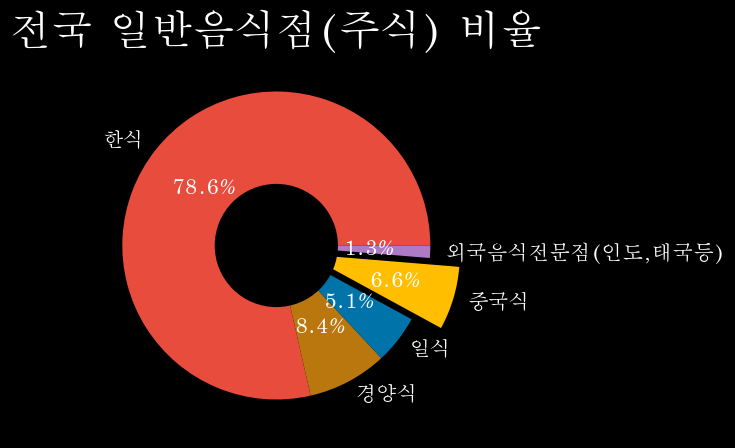

Insight: 현재 전국에서 영업중인 주식 음식점들 중 짬뽕을 파는 중국식 음식점이 차지하는 비율은 약 7%이다. 한식과 경양식 다음으로 높은 비율을 차지하나 한국을 다문화적인 국가로 만들기 위해선 좀 더 번창할 필요가 있어 보인다.


In [65]:
plt.rcParams['font.family'] = "AppleMyungjo"    # 맥 전용 (띄어쓰기 없음)
plt.rcParams["font.size"] = 15
plt.rcParams["text.color"] = 'white'
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['axes.unicode_minus'] = False

plt.title('전국 일반음식점(주식) 비율', fontsize = 30)
explode = (0, 0, 0, 0.2, 0)
colors = ['#E74C3C', '#B9770E', '#0073A9', '#FFBF00', '#AF7AC5']
주식data['count'].plot.pie(autopct = '%0.1f%%', 
                         colors = colors, 
                         explode = explode
                         ).set_ylabel('') # 소수점 1자리수까지 표시 + '%' 표시
centre_circle = plt.Circle((0,0),0.40,fc='black')
fig = plt.gcf()
fig.set_facecolor('black')
fig.gca().add_artist(centre_circle)
plt.show()
plt.close()
print('Insight: 현재 전국에서 영업중인 주식 음식점들 중 짬뽕을 파는 중국식 음식점이 차지하는 비율은 약 7%이다. 한식과 경양식 다음으로 높은 비율을 차지하나 한국을 다문화적인 국가로 만들기 위해선 좀 더 번창할 필요가 있어 보인다.')

#### 3.. 중국 음식점들의 유래 (전국)
- 데이터 전처리

중국식당의 data만 추출 - .query()

In [66]:
중국식당data = 식당data.query("업태구분명 == '중국식'") # 중국식당의 인허가일자만 추출
중국식당data

,업태구분명,사업장명,인허가일자,영업상태명,폐업일자,재개업일자,소재지전체주소,좌표정보(X),좌표정보(Y)
8,중국식,쨈(jam),2018-12-12,폐업,2023-02-28,NaN,서울특별시 종로구 청진동 17,198213.106161,452176.777357
9,중국식,이화,2018-12-17,폐업,2020-06-01,NaN,서울특별시 종로구 이화동 134번지 안성카센타,200235.828635,452712.072753
51,중국식,광화문 커피집,2011-03-30,폐업,2021-05-25,NaN,서울특별시 종로구 도렴동 83 지하철 5호선 광화문역 지하1층,NaN,NaN
84,중국식,호중정원,2018-10-15,폐업,2023-03-23,NaN,서울특별시 종로구 소격동 17-1,198269.802497,453213.650351
86,중국식,전선생(全先生),2018-10-18,폐업,2020-05-06,NaN,서울특별시 종로구 창신동 583-95번지,200883.062629,452530.632630
...,...,...,...,...,...,...,...,...,...
2079881,중국식,샤오츠,2019-02-22,영업/정상,NaN,NaN,제주특별자치도 서귀포시 성산읍 성산리 392 제주 성산 리치유 클래시아,193384.598580,-3986.978187
2079890,중국식,천향각,2019-02-12,영업/정상,NaN,NaN,제주특별자치도 서귀포시 서귀동 416-2번지 삼일아트리움 2층 208호,159338.415276,-27572.239072
2079933,중국식,썬앤문(SUN&MOON),2019-01-22,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 안덕면 사계리 2166-3 1,2층",134771.205439,-29619.895066
2079973,중국식,성산짬뽕,2019-01-15,영업/정상,NaN,NaN,제주특별자치도 서귀포시 성산읍 성산리 171-7번지 1층,193561.024048,-3709.424901


인허가일자만 추출
- DataFrame, .filter(), .value_counts(), .sort_index()
- .query('count != 0')을 통해 빈 값은 배제

In [143]:
인허가data_pre1 = DataFrame(중국식당data.filter(['인허가일자']).value_counts().sort_index())
인허가data = DataFrame(인허가data_pre1.query('count != 0').sort_index())
인허가data.rename(columns = {'count':'인허가count'}, inplace = True)

인허가data

,인허가count
인허가일자,
1904-08-08,2
1929-08-11,1
1954-05-08,1
1955-04-22,1
1956-11-01,1
...,...
2023-06-23,10
2023-06-26,4
2023-06-27,8


폐업일자만 추출

In [77]:
폐업data_pre1 = DataFrame(중국식당data.filter(['폐업일자']).value_counts().sort_index())
폐업data = DataFrame(폐업data_pre1.query('count != 0').sort_index())
폐업data.rename(columns = {'count':'폐업count'}, inplace = True)


폐업data

,폐업count
폐업일자,
1983-09-09,1
1984-08-25,1
1986-06-20,1
1986-12-01,1
1987-03-21,1
...,...
2023-06-23,8
2023-06-26,8
2023-06-27,14


병합

In [124]:
인폐data_pre1 = concat([인허가data, 폐업data])


인폐data_pre1


,인허가count,폐업count
1904-08-08,2.0,NaN
1929-08-11,1.0,NaN
1954-05-08,1.0,NaN
1955-04-22,1.0,NaN
1956-11-01,1.0,NaN
...,...,...
2023-06-23,NaN,8.0
2023-06-26,NaN,8.0
2023-06-27,NaN,14.0
2023-06-28,NaN,4.0


결측치 정제 - 0 으로 대체 
 - .fillna()

In [159]:
인폐data = DataFrame(인폐data_pre1.fillna(value = 0).reset_index())
인폐data.rename(columns = {'level_0':'날짜'}, inplace = True)
인폐data

,날짜,인허가count,폐업count
0,1904-08-08,2.0,0.0
1,1929-08-11,1.0,0.0
2,1954-05-08,1.0,0.0
3,1955-04-22,1.0,0.0
4,1956-11-01,1.0,0.0
...,...,...,...
20593,2023-06-23,0.0,8.0
20594,2023-06-26,0.0,8.0
20595,2023-06-27,0.0,14.0
20596,2023-06-28,0.0,4.0


날짜 별 영업하는 중식당 개수 추출

In [162]:
중식당수list = []
중식당수value = 0
for a in range(len(인폐data['날짜'])):
    중식당수value += 인폐data['인허가count'][a] - 인폐data['폐업count'][a]
    중식당수list.append(중식당수value)

인폐data['중식당수'] = 중식당수list
인폐data


,날짜,인허가count,폐업count,중식당수
0,1904-08-08,2.0,0.0,2.0
1,1929-08-11,1.0,0.0,3.0
2,1954-05-08,1.0,0.0,4.0
3,1955-04-22,1.0,0.0,5.0
4,1956-11-01,1.0,0.0,6.0
...,...,...,...,...
20593,2023-06-23,0.0,8.0,26343.0
20594,2023-06-26,0.0,8.0,26335.0
20595,2023-06-27,0.0,14.0,26321.0
20596,2023-06-28,0.0,4.0,26317.0


도수분포표

In [167]:
hist, bins = np.histogram(인폐data['날짜'], bins = 10)
print(hist)
print(bins)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

시각화

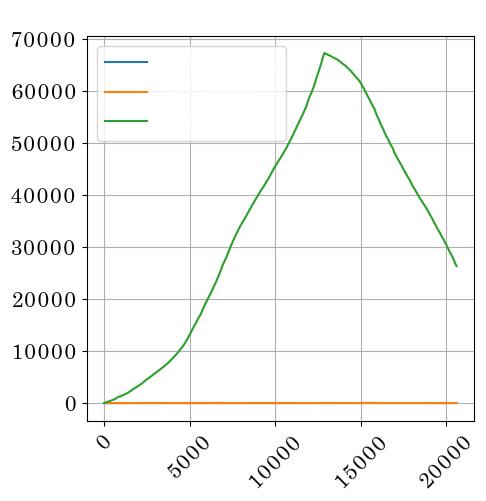

In [357]:
폐업data = 중국식당data.filter(['폐업일자'])
폐업data['폐업일자'].isna().sum()


26313

In [356]:
중영업data = DataFrame(중국식당data.filter(['영업상태명']))
중영업data.query("영업상태명 == '폐업'").count()


영업상태명    40946
dtype: int64

폐업한 중식당 중 한 식당 폐업일자 안 적힘

In [362]:
a = 중국식당data.filter(['영업상태명', '폐업일자'])
b = a.query("영업상태명 == '폐업'")
b.filter(['폐업일자']).isna().sum()

폐업일자    1
dtype: int64

In [321]:
인허가data['인허가일자'].isna().sum()

1